## U4 :: Análisis de estructuras en red
# **Práctica 1 - Crear y manipular grafos**


---

<br>

Un departamento de IT de una empresa cuenta ocho empleados a los que se les pidió que eligieran las 3 películas que más les gustaría ver en las visitas que realizan en grupo al cine semanalmente. Las elecciones están disponibles en el fichero `elecciones_pelis_empleados.txt`.

En un segundo archivo, `afinidad_empleados.txt`, tienes datos sobre el grado de afinidad que existe en las relaciones entre diferentes compañeros de trabajo. La puntuación de la relación tiene un valor de -100 (enemigos) a +100 (mejores amigos). Un valor de cero significa que los dos empleados no han interactuado o son indiferentes.

Ambos archivos están delimitados por tabulaciones.

<br>
NOTA: Se aconseja revisa el cuaderno `Operaciones y Carga de Grafos en NetworkX.ipynb`


In [27]:
import networkx as nx

# 
# from google.colab import drive
# 
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/Módulos :: 2022-23/Modelos de inteligencia artificial (IA-BD)/4. Análisis de estructuras en red/Prácticas/'

# Lista de empleados
empleados = {'Raimundo', 'Juanele', 'Jorgina', 'Vicent', 'Anastasio', 'Frida', 'Ronaldo', 'Paquito'}

# Lista de películas
peliculas = {'Blade_Runner', '2001_Una_Odisea_en_el_espacio', 'The_Matrix', 'Doce_Monos', 'Regreso_al_Futuro',
             'Gattaca', 'Alien_El_Octavo_Pasajero', 'Terminator', 'Encuentros_en_la_Tercera_Fase', 'Primer',
             'Ex_Machina'}


Puedes usar la siguiente función ***plot_graph*** para representar por pantalla un grafo que le sea pasado como argumento.

In [28]:



def plot_graph(G, nombre_peso=None):
    '''
    G: es el grafo recibido como argumento
    nombre_pesos: nombre del atributo para representar el peso de los enlaces (si G incluye pesos)
    '''
    import matplotlib.pyplot as plt

    plt.figure(3, figsize=(9, 9))
    pos = nx.spring_layout(G)
    enlaces = G.edges()
    pesos = None

    if nombre_peso:
        pesos = [int(G[u][v][nombre_peso]) for u, v in enlaces]
        etiquetas = nx.get_edge_attributes(G, nombre_peso)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas)
        nx.draw_networkx(G, pos, edges=enlaces, width=pesos);
    else:
        nx.draw_networkx(G, pos)

### **Ejercicio 1**

Con NetworkX, añade el código en la siguiente función que cargue el grafo bipartito de `elecciones_pelis_empleados.txt` (mediante `plot_graph`puedes representar el grafo resultante).

*Asegúrate que la función devuelve un grafo con 19 nodos y 24 enlaces*

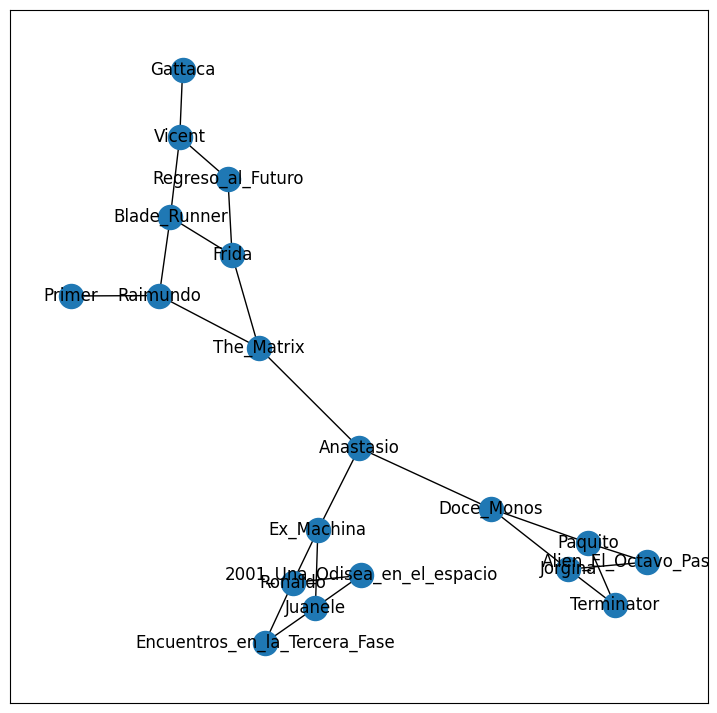

In [29]:
def ejercicio_1():
    G = nx.read_edgelist('elecciones_pelis_empleados.txt')
    return G


graph = ejercicio_1()
plot_graph(graph)

### **Ejercicio 2**

Usando el grafo de la pregunta anterior, agrega atributos a los nodos con el nombre `'tipo'` donde las películas tienen el valor `'película'` y los empleados tienen el valor `'empleado'`, y devuelve ese gráfico.

*Esta función debería devolver un grafo (G) con atributos de nodo `{'tipo': 'pelicula'}` o `{'tipo': 'empleado'}`*

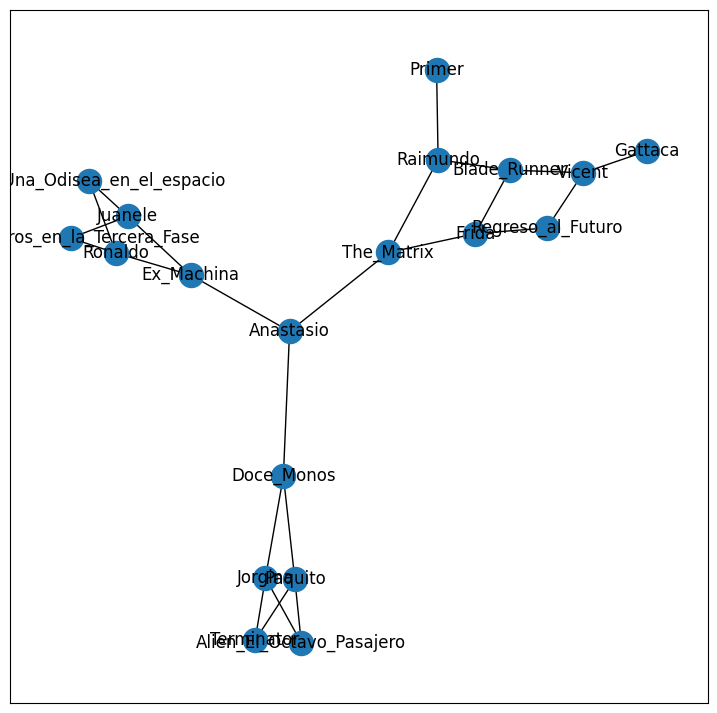

In [30]:
# Versión 1

def ejercicio_2():
    G = ejercicio_1()

    for node in G.nodes():
        if node in empleados:
            G.nodes[node]['tipo'] = 'empleado'
        else:
            G.nodes[node]['tipo'] = 'pelicula'

    return G


plot_graph(ejercicio_2())

### **Ejercicio 3**

Prepara un grafo proyectado ponderado que use el grafo obtenido en el `ejercicio_2` que informe de cuántas películas tienen en común diferentes pares de empleados.

*Esta función debe devolver un gráfico proyectado ponderado*.

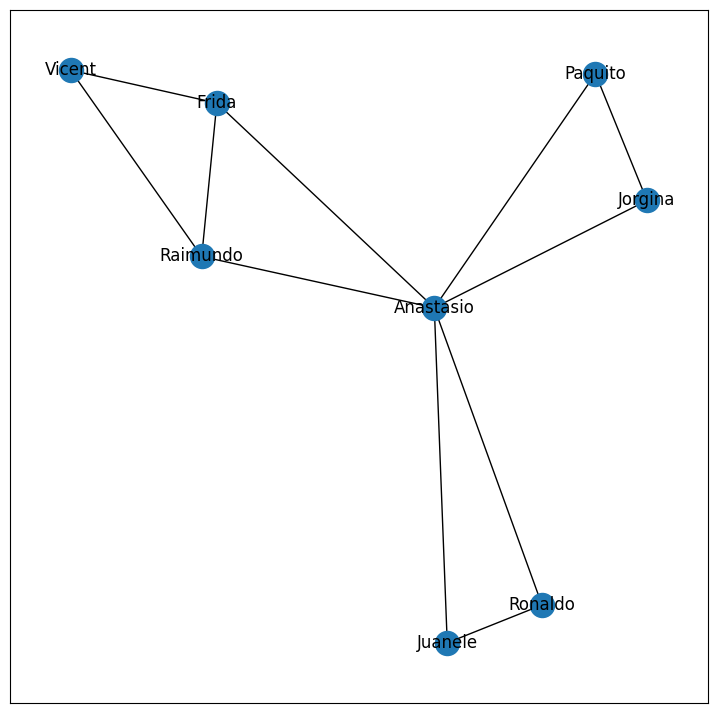

In [31]:
def ejercicio_3():
    G = ejercicio_2()
    G = nx.bipartite.weighted_projected_graph(G, empleados)
    return G


plot_graph(ejercicio_3())

### **Ejercicio 4**

Supongamos ahora que deseamos averiguar si a las personas que son más afines (es decir, tienen una puntuación alta en su relación) también les gustan los mismos tipos de películas.

Encuentra la correlación de Pearson (usando `DataFrame.corr()`) entre las puntuaciones de afinidad empleados y el número de películas que tienen en común. Si dos empleados no tienen películas en común, deberá tratarse como un 0 (es decir, no hay que dejarlo como un valor vacío) y debe incluirse en el cálculo de correlación.

*La función debe devolver un tipo flotante*

<br>

**Pregunta**: ¿Los empleados más afines comparten gustos?

<br>

Recurso: https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/

In [37]:
def ejercicio_4() -> float:
    affinity = nx.read_edgelist('./afinidad_empleados.txt', delimiter=',', data=(('weight', int),))
    movies = ejercicio_3()

    # Create a DataFrame
    df_affinity = nx.to_pandas_edgelist(affinity)
    df_movies = nx.to_pandas_edgelist(movies)

    # Merge the two DataFrames
    df = df_affinity.merge(df_movies, on=['source', 'target'], how='left')

    # Fill all the missing values with 0
    df.fillna(0, inplace=True)

    # Calculate the Pearson correlation
    return df['weight_x'].corr(df['weight_y'])


# Calculamos la correlación de Pearson
print("El valor de la correlación es: {0:4.2f}".format(ejercicio_4()))

El valor de la correlación es: 0.48
